In [1]:
# Fraud Detection with Logistic Regression & XGBoost

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
# Step 2: Load Dataset
df = pd.read_csv("creditcard.csv")
print("Original shape:", df.shape)


Original shape: (284807, 31)


In [3]:
# Step 3: Preprocess
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df.drop('Time', axis=1, inplace=True)

In [4]:
# Step 4: Split Features/Labels
X = df.drop('Class', axis=1)
y = df['Class']

In [5]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [6]:
# Step 6: Apply SMOTE to balance the training set
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_res.value_counts())


Class distribution after SMOTE:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [8]:
# Step 7: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(X_test)
y_scores_lr = lr.predict_proba(X_test)[:, 1]

print("\n🔎 Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_scores_lr))



🔎 Logistic Regression Results:
[[83328  1967]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC Score: 0.9676177115036368


In [9]:
# Step 8: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_res, y_res)
y_pred_xgb = xgb.predict(X_test)
y_scores_xgb = xgb.predict_proba(X_test)[:, 1]

print("\n🔎 XGBoost Results:")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_scores_xgb))

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:29:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔎 XGBoost Results:
[[85252    43]
 [   28   120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.74      0.81      0.77       148

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9705303374774036


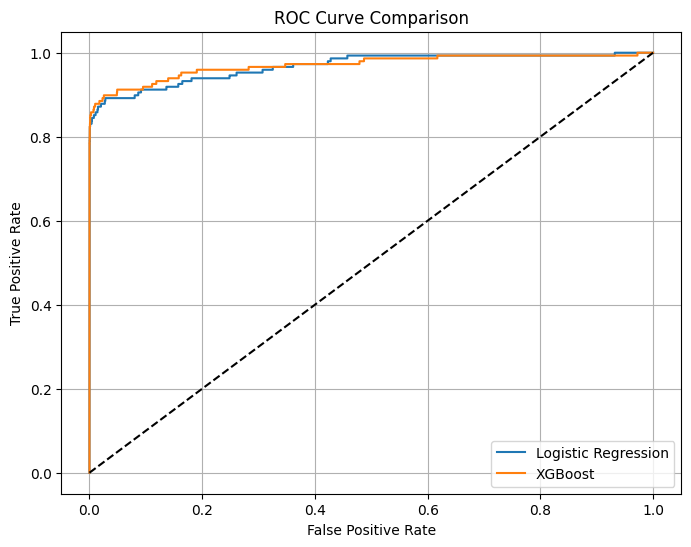

In [10]:
# Step 9: Compare ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

In [2]:
!jupyter nbconvert --to script fraud_detection_app.ipynb


[NbConvertApp] Converting notebook fraud_detection_app.ipynb to script
[NbConvertApp] Writing 2482 bytes to fraud_detection_app.py


In [3]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [2]:
!type requirements.txt


altair==5.5.0
anyio==4.7.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.2.0
blinker==1.9.0
bs4==0.0.2
cachetools==5.5.2
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.4.0
click==8.2.1
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
curl_cffi==0.11.4
cycler==0.12.1
debugpy==1.8.9
decorator==5.1.1
defusedxml==0.7.1
et_xmlfile==2.0.0
executing==2.1.0
fastjsonschema==2.21.1
fonttools==4.55.8
fqdn==1.5.1
frozendict==2.4.6
gitdb==4.0.12
GitPython==3.1.44
h11==0.14.0
html5lib==1.1
httpcore==1.0.7
httpx==0.28.1
idna==3.10
imbalanced-learn==0.13.0
ipykernel==6.29.5
ipython==8.30.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.4
joblib==1.4.2
json5==0.10.0
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server

In [3]:
with open("requirements.txt", "w") as f:
    f.write("""streamlit
pandas
scikit-learn
imbalanced-learn
xgboost
matplotlib
seaborn""")


In [4]:
!type requirements.txt


streamlit
pandas
scikit-learn
imbalanced-learn
xgboost
matplotlib
seaborn


In [5]:
import os
os.getcwd()


'C:\\Users\\KIIT'